## A life-cycle consumption model allowing for borrowing 

- because of borrowing, now the agents can borrow up to their natural borrowing constraint, which is the discounted value of the worst-case income.

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from Utility import cal_ss_2markov,mean_preserving_spread
from copy import copy 

In [150]:
from SolveLifeCycle import LifeCycle, solve_model_backward_iter, solve_model_iter

In [151]:
## plot configuration 

plt.style.use('seaborn')
plt.rcParams["font.family"] = "Times New Roman" #'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['axes.labelweight'] = 'bold'

## Set the 
plt.rc('font', size=25)
# Set the axes title font size
plt.rc('axes', titlesize=20)
# Set the axes labels font size
plt.rc('axes', labelsize=20)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=20)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=20)
# Set the legend font size
plt.rc('legend', fontsize=20)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)

/var/folders/39/ks6jc__9375c2fl7h7pwq5jh0000gn/T/ipykernel_20332/3698005312.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Initialize the model

In [152]:
if __name__ == "__main__":

    ## parameters 
    ###################

    U = 0.2 ## transitory ue risk
    U0 = 0.0 ## transitory ue risk

    ## life cycle 

    T = 40
    L = 60
    G = np.ones(L)
    YPath = np.cumprod(G)

## Life-Cycle Problem 

In [153]:
if __name__ == "__main__":
    lc_paras = {'sigma_psi':0.15, # permanent 
                'sigma_eps': 0.0, #transitory
                'U':U,
                'ρ':2,
                'R':1.01,
                'T':T,
                'L':L,
                'G':G,
                'β':0.92,
                'x':0.0,  # no MA shock 
                ###########################
                'borrowing_cstr':False, ## let natural borrowing limit bind
                ###########################
                'b_y':0.0, #no persistent state
                'unemp_insurance':0.5, ## make unemployment insurance more generous so that nbc is less binding 
                'grid_max': 1.0,
                'grid_min': -0.2,
                }

In [154]:
if __name__ == "__main__":
    lc = LifeCycle(**lc_paras)

### Consumption  the last period 

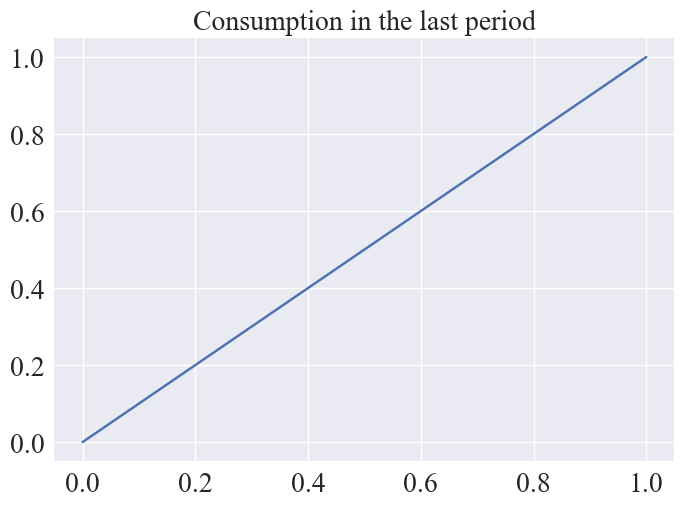

In [155]:
# Initial the end-of-period consumption policy of σ = consume all assets

if __name__ == "__main__":

    ## initial consumption functions 
    
    m_init,σ_init = lc.terminal_solution()
    plt.title('Consumption in the last period')
    plt.plot(m_init[0:-1,0,1],
             σ_init[0:-1,0,1])

In [156]:
if __name__ == "__main__":

    t_start = time()

    
    ### this line is very important!!!!
    #### need to regenerate shock draws for new sigmas
    lc.prepare_shocks()

    ## terminal solution
    m_init,σ_init = lc.terminal_solution()

    ## solve backward
    ms_star_basic, σs_star_basic = solve_model_backward_iter(lc,
                                                 m_init,
                                                 σ_init)


    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

Time taken, in seconds: 1.0474648475646973


### Different permanent/transitory risk (no MA)

In [157]:
if __name__ == "__main__":
    lc_pt_paras = copy(lc_paras)
    
    lc_pt = LifeCycle(**lc_pt_paras)

In [158]:
if __name__ == "__main__":

    t_start = time()

    sigma_psi_ls = [0.03,0.2]
    sigma_eps_ls = [0.03,0.2]
    
    ms_stars =[]
    σs_stars = []
    for i,sigma_psi in enumerate(sigma_psi_ls):
        lc_pt.sigma_psi = sigma_psi
        lc_pt.sigma_eps = sigma_eps_ls[i]
        ### this line is very important!!!!
        #### need to regenerate shock draws for new sigmas
        lc_pt.prepare_shocks()
        
        ## terminal solution
        m_init,σ_init = lc_pt.terminal_solution()
        
        ## solve backward
        ms_star, σs_star = solve_model_backward_iter(lc_pt,
                                                     m_init,
                                                     0.5*σ_init)
        ms_stars.append(ms_star)
        σs_stars.append(σs_star)


    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

Time taken, in seconds: 2.767335891723633


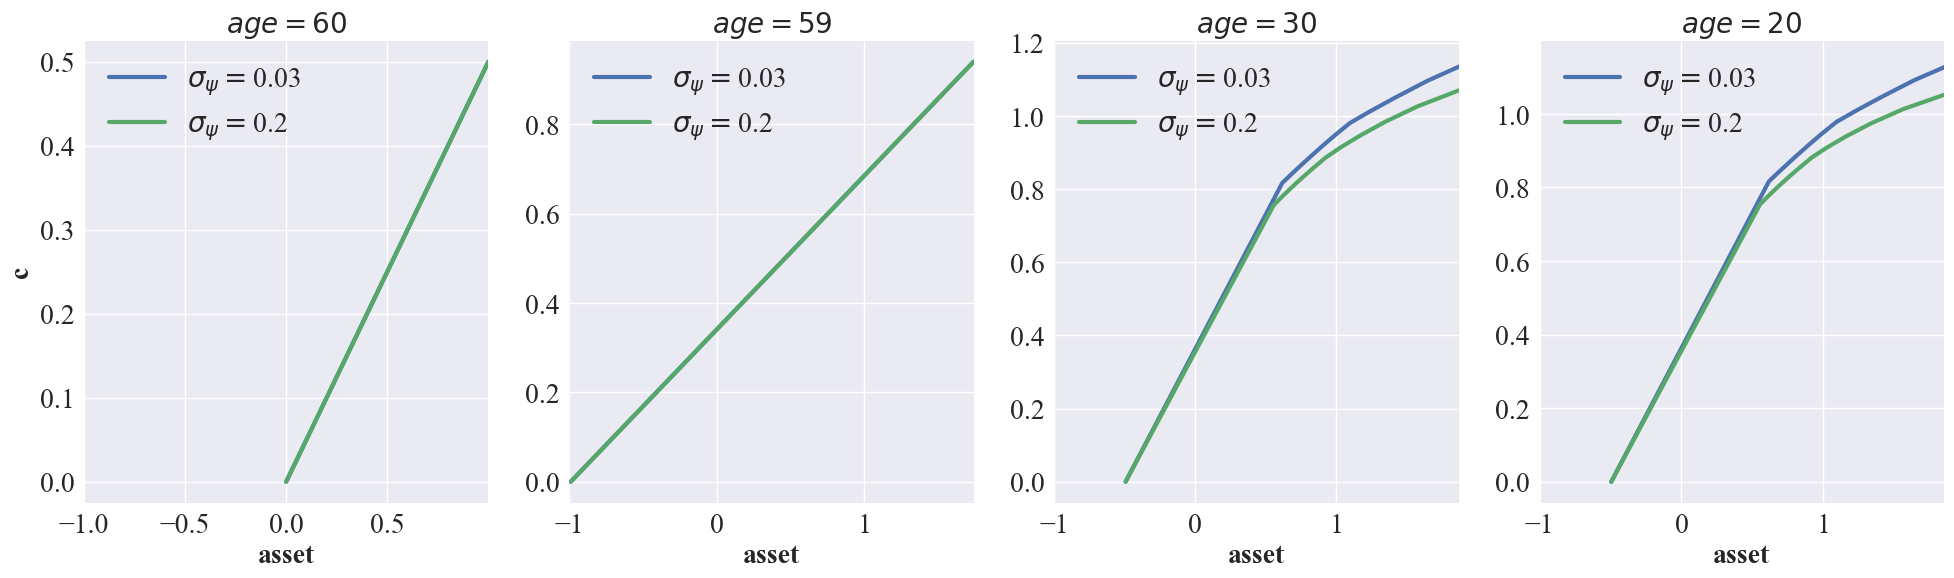

In [159]:
if __name__ == "__main__":


    ## plot c func at different age /asset grid
    years_left = [0,1,30,40]

    n_sub = len(years_left)

    eps_fix = 0 ## the first eps grid 

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc_pt.L-year
        i = lc_pt.L-age
        for k,sigma_psi in enumerate(sigma_psi_ls):
            m_plt,c_plt = ms_stars[k][i,0:-1,eps_fix,0],σs_stars[k][i,0:-1,eps_fix,0]
            axes[x].plot(m_plt,
                         c_plt,
                         label = r'$\sigma_\psi=$'+str(sigma_psi),
                         lw=3,
                        )
        axes[x].legend()
        axes[x].set_xlim(-1.0,np.max(m_plt))
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'$age={}$'.format(age))

In [160]:
## the size of consumption function is  T x nb_a x nb_eps x nb_z 
if __name__ == "__main__":
    print(σs_star.shape)

(60, 50, 2, 2)


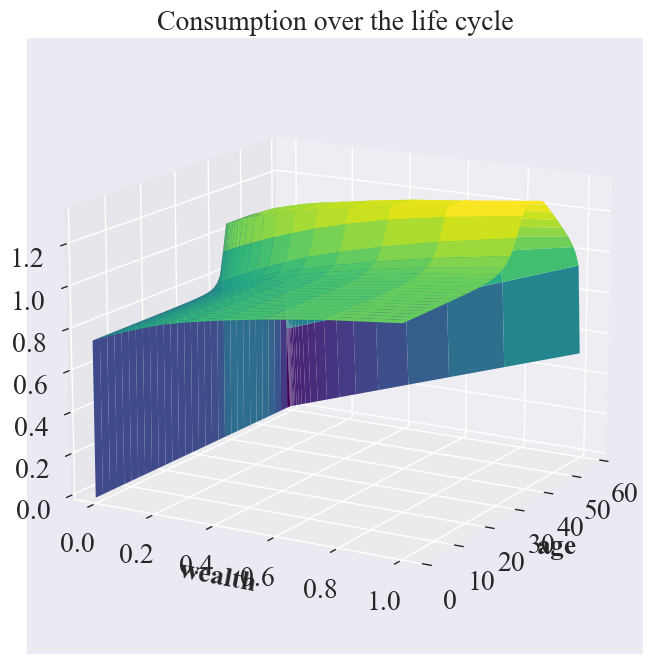

In [161]:
if __name__ == "__main__":

    ## plot 3d functions over life cycle 

    ages = np.array(range(ms_star.shape[0]))
    asset = ms_star[0,0:-1,0,0]
    xx, yy = np.meshgrid(ages, asset)
    c_stars = np.flip(σs_star[:,0:-1,0,0],axis=0).T

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, 
                         projection='3d')
    dem3d = ax.plot_surface(xx,
                            yy,
                            c_stars,
                            cmap="viridis"
                           )
    ax.set_xlim(60,0)
    ax.set_title('Consumption over the life cycle')
    ax.set_xlabel('age')
    ax.set_ylabel('wealth')
    ax.view_init(15, 30)

### With a Markov/persistent state: good versus bad 

In [162]:
if __name__ == "__main__":
    lc_ar_paras = copy(lc_paras)
    lc_ar_paras['b_y'] = 0.5
    ## initialize another 
    lc_ar = LifeCycle(**lc_ar_paras)

In [163]:
if __name__ == "__main__":


    ## solve the model for different persistence 
    t_start = time()
    
    P = np.array([(0.8, 0.2),
                  (0.05, 0.95)])
    
    P_ls = [P]
    
    ms_stars_ar = []
    σs_stars_ar = []

    for i, P in enumerate(P_ls):

        ## feed the model with a markov matrix of macro state 
        
        lc_ar.P = P
        ## no need to reinitialize the model because P is only used in solving stage

        ## terminal solution
        m_init_ar,σ_init_ar = lc_ar.terminal_solution()

    
        ## solve the model 
        ms_star_ar, σs_star_ar = solve_model_backward_iter(lc_ar,
                                                         m_init_ar,
                                                         σ_init_ar)
        ms_stars_ar.append(ms_star_ar)
        σs_stars_ar.append(σs_star_ar)


    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

Time taken, in seconds: 0.03377199172973633


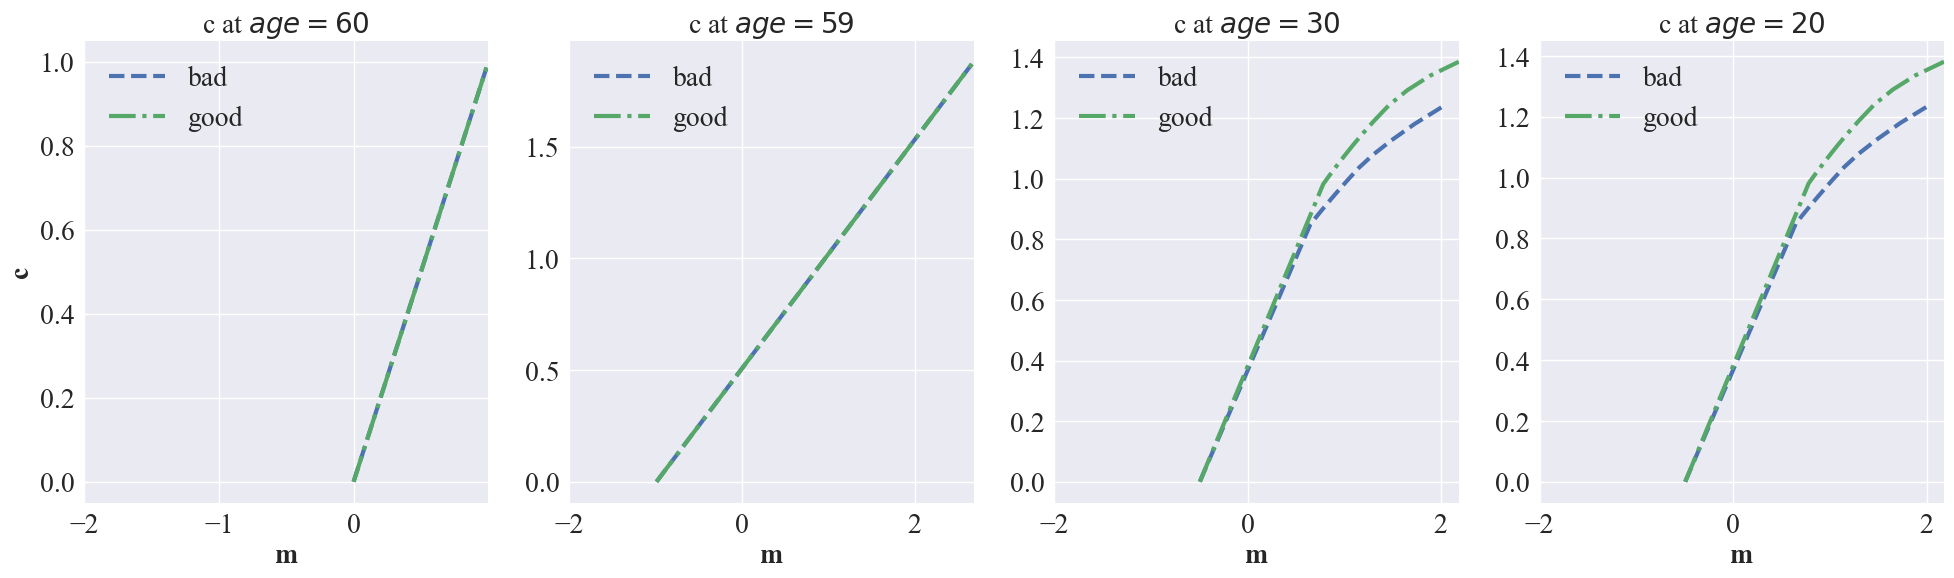

In [164]:
if __name__ == "__main__":


    ## compare two markov states good versus bad 

    years_left = [0,1,30,40]

    n_sub = len(years_left)

    eps_ls = [0]

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc_ar.L-year
        i = lc_ar.L-age
        for eps in eps_ls:
            m_plt_l,c_plt_l = ms_stars_ar[0][i,0:-1,eps,0],σs_stars_ar[0][i,0:-1,eps,0]
            m_plt_h,c_plt_h  = ms_stars_ar[0][i,0:-1,eps,1],σs_stars_ar[0][i,0:-1,eps,1]
            axes[x].plot(m_plt_l,
                         c_plt_l,
                         '--',
                         label ='bad',
                         lw=3)
            axes[x].plot(m_plt_h,
                         c_plt_h,
                         '-.',
                         label ='good',
                         lw=3)
        axes[x].legend()
        axes[x].set_xlim((-2.0,np.max(m_plt_h)))
        axes[x].set_xlabel('m')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'c at $age={}$'.format(age))

### State-dependent risks 

In [165]:
if __name__ == "__main__":

    ## transition matrix between low and high risk state

    P = np.array([(0.5, 0.5),
                  (0.5, 0.5)])   # markov transition matrices

    ss_P = cal_ss_2markov(P)
    prob_l = P[0,0]
    prob_h = P[0,1]

    ## keep average risks the same 
     
    sigma_psi_2mkv = np.sqrt(
        mean_preserving_spread(
            mean = lc.sigma_psi**2,
            probs = np.array([prob_l,prob_h]),
            l2mean_ratio = 0.01)
    )
    
    sigma_eps_2mkv = np.sqrt(
        mean_preserving_spread(
            mean = lc.sigma_eps**2,
            probs = np.array([prob_l,prob_h]),
            l2mean_ratio = 0.01)
    )

    b_y = 0.0  ## set the macro state loading to be zero, i.e. only risks differ across two states

In [166]:
if __name__ == "__main__":
    ## compute steady state 
    av_sigma_psi = np.sqrt(np.dot(P[0,:],sigma_psi_2mkv**2))
    av_sigma_eps = np.sqrt(np.dot(P[0,:],sigma_eps_2mkv**2))
    print('steady state is '+str(ss_P))
    print('transitory probability is '+str(P[0,:]))
    print('average permanent risk is '+str(av_sigma_psi)+' compared to objective model '+str(lc.sigma_psi))
    print('average transitory risk is '+str(av_sigma_eps)+' compared to objective model '+str(lc.sigma_eps))

steady state is [0.5 0.5]
transitory probability is [0.5 0.5]
average permanent risk is 0.15 compared to objective model 0.15
average transitory risk is 0.0 compared to objective model 0.0


In [167]:
if __name__ == "__main__":

    print('permanent risk state is '+str(sigma_psi_2mkv))
    print('transitory risk state is '+str(sigma_eps_2mkv))

permanent risk state is [0.015      0.21160104]
transitory risk state is [0. 0.]


In [168]:
if __name__ == "__main__":

    ## another model instance 
    lc_sv_paras = copy(lc_paras)
    lc_sv_paras['sigma_psi_2mkv'] = sigma_psi_2mkv
    lc_sv_paras['sigma_eps_2mkv'] = sigma_eps_2mkv
    lc_sv_paras['state_dependent_risk'] = True

    lc_sv0 = LifeCycle(**lc_sv_paras)

In [169]:
if __name__ == "__main__":

    ## solve the model for different transition matricies 

    t_start = time()

    P_ls = [P]
    ms_stars_sv = []
    σs_stars_sv = []

    for i, P in enumerate(P_ls):

        ## feed the model with a markov matrix of macro state 
        lc_sv0.P = P

        ## terminal solution       
        m_init_sv,σ_init_sv = lc_sv0.terminal_solution()

        ## solve the model 
        ms_star_sv, σs_star_sv = solve_model_backward_iter(lc_sv0,
                                                           m_init_sv,
                                                           σ_init_sv)
        ms_stars_sv.append(ms_star_sv)
        σs_stars_sv.append(σs_star_sv)

    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

Time taken, in seconds: 0.03351092338562012


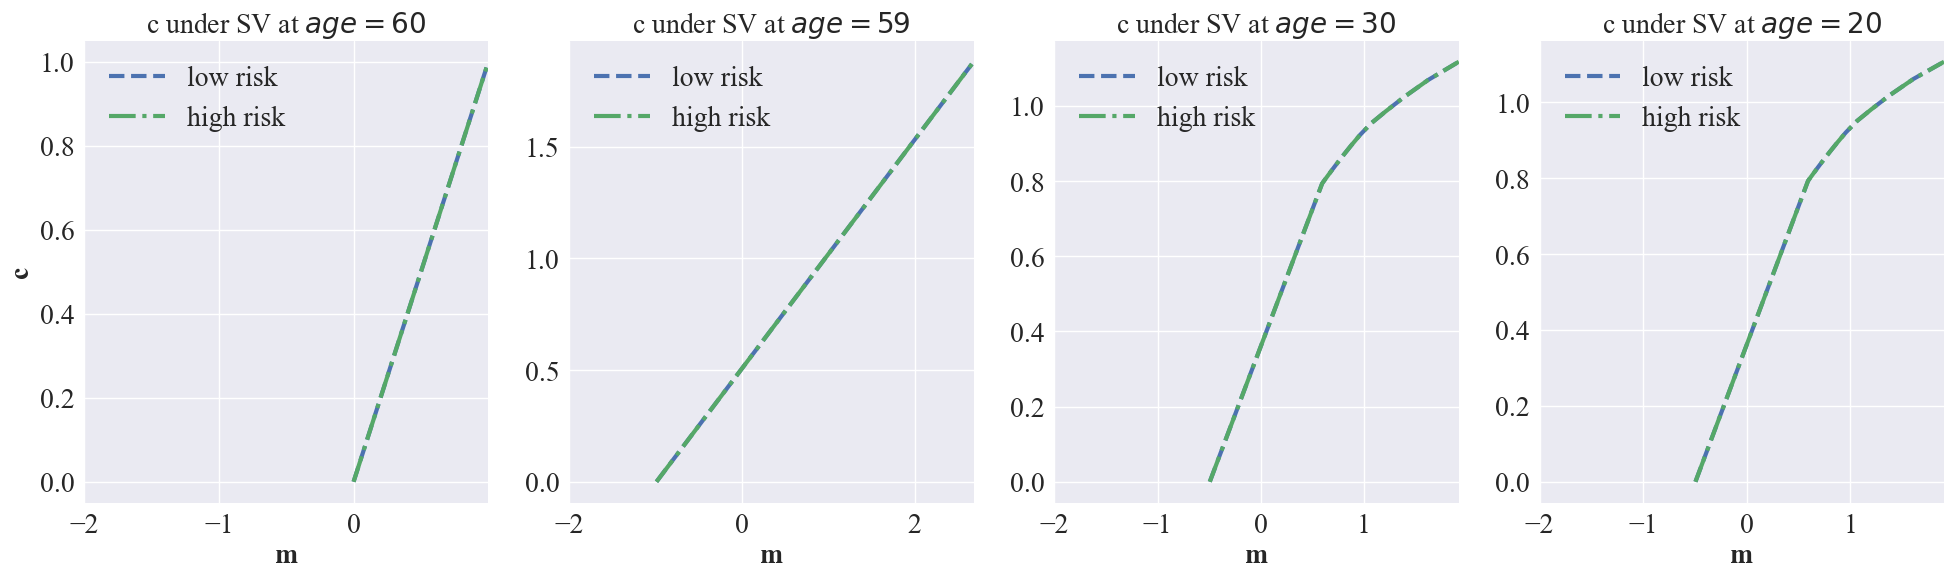

In [170]:
if __name__ == "__main__":
    ## compare two markov states low versus high risk 

    years_left = [0,1,30,40]

    n_sub = len(years_left)

    eps_id = 0

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc.L-year
        i = lc.L-age
        m_plt_l,c_plt_l = ms_stars_sv[0][i,0:-1,eps_id,0],σs_stars_sv[0][i,0:-1,eps_id,0]
        m_plt_h,c_plt_h = ms_stars_sv[0][i,0:-1,eps_id,1],σs_stars_sv[0][i,0:-1,eps_id,1]
        
        axes[x].plot(m_plt_l, ## 0 indicates the low risk state 
                     c_plt_l,
                     '--',
                     label ='low risk',
                     lw=3)
        
        axes[x].plot(m_plt_h, ## 1 indicates the high risk state 
                     c_plt_h,
                     '-.',
                     label ='high risk',
                     lw=3)
        axes[x].legend()
        axes[x].set_xlim((-2.0,np.max(m_plt_h)))

        axes[x].set_xlabel('m')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'c under SV at $age={}$'.format(age))

### Comparison: objective and subjective risk perceptions

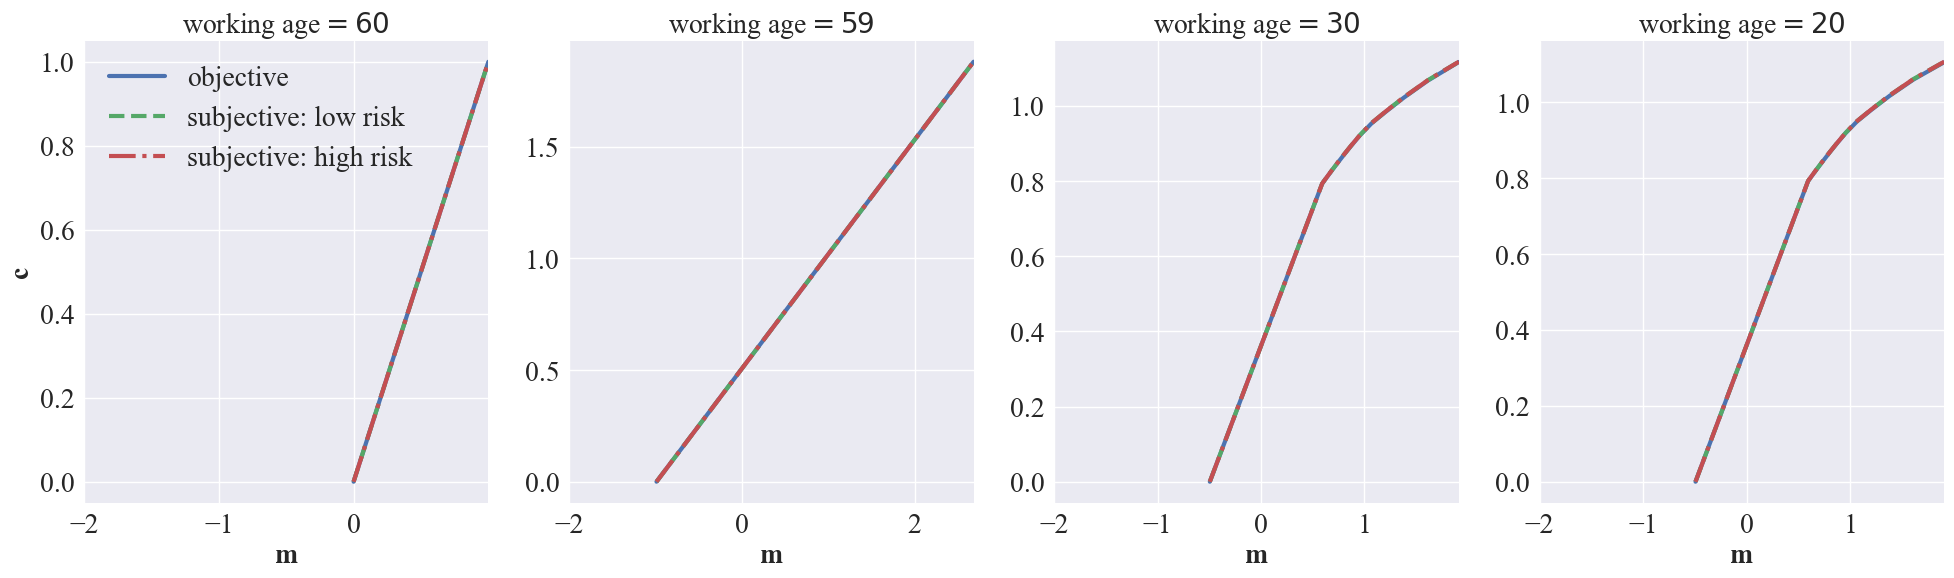

In [171]:
if __name__ == "__main__":


    ## compare subjective and objective models 
    years_left = [0,1,30,40]


    n_sub = len(years_left)

    eps_fix = 0

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc.L-year
        i = lc.L-age

        ## baseline: no ma shock 
        m_plt,c_plt = ms_star_basic[i,0:-1,eps_fix,0],σs_star_basic[i,0:-1,eps_fix,0]
        axes[x].plot(m_plt,
                     c_plt,
                     label = 'objective',
                     lw=3)
     
         ## stochastic volatility 
        m_plt_l,c_plt_l = ms_stars_sv[0][i,0:-1,eps_fix,0],σs_stars_sv[0][i,0:-1,eps_fix,0]
        m_plt_h,c_plt_h = ms_stars_sv[0][i,0:-1,eps_fix,1],σs_stars_sv[0][i,0:-1,eps_fix,1]

        axes[x].plot(m_plt_l, ## 0 indicates the low risk state 
                     c_plt_l,
                     '--',
                     label ='subjective: low risk',
                     lw=3)
        axes[x].plot(m_plt_h, ## 1 indicates the high risk state 
                     c_plt_h,
                     '-.',
                     label ='subjective: high risk',
                     lw=3)

        axes[0].legend()
        axes[x].set_xlim((-2.0,np.max(m_plt)))
        axes[x].set_xlabel('m')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'working age$={}$'.format(age))

    fig.savefig('../Graphs/model/comparison1.png')

### With a Markov/persistent unemployment state

In [172]:
if __name__ == "__main__":


    ## transition matrix between emp and uemp

    ## transition probability during normal times of the economy 

    P_uemkv = np.array([(0.2, 0.8),
                        (0.2, 0.8)])   # markov transition matrices


In [173]:
if __name__ == "__main__":
    lc_uemkv_paras = copy(lc_paras)
    lc_uemkv_paras['ue_markov'] = True
    
    ## initialize another 
    lc_uemkv = LifeCycle(**lc_uemkv_paras)

In [174]:
if __name__ == "__main__":

    ## solve the model for different transition matrices of UE markov
    t_start = time()

    P_ls = [P_uemkv]
    ms_stars_uemkv=[]
    σs_stars_uemkv = []

    for i, P in enumerate(P_ls):

        ## feed the model with a markov matrix of macro state 
        lc_uemkv.P = P

        ## terminal solution
        m_init_uemkv,σ_init_uemkv = lc_uemkv.terminal_solution()

        ## solve the model 
        ms_star_uemkv, σs_star_uemkv = solve_model_backward_iter(lc_uemkv,
                                                                 m_init_uemkv,
                                                                 σ_init_uemkv)
        ms_stars_uemkv.append(ms_star_uemkv)
        σs_stars_uemkv.append(σs_star_uemkv)

    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

Time taken, in seconds: 0.033386945724487305


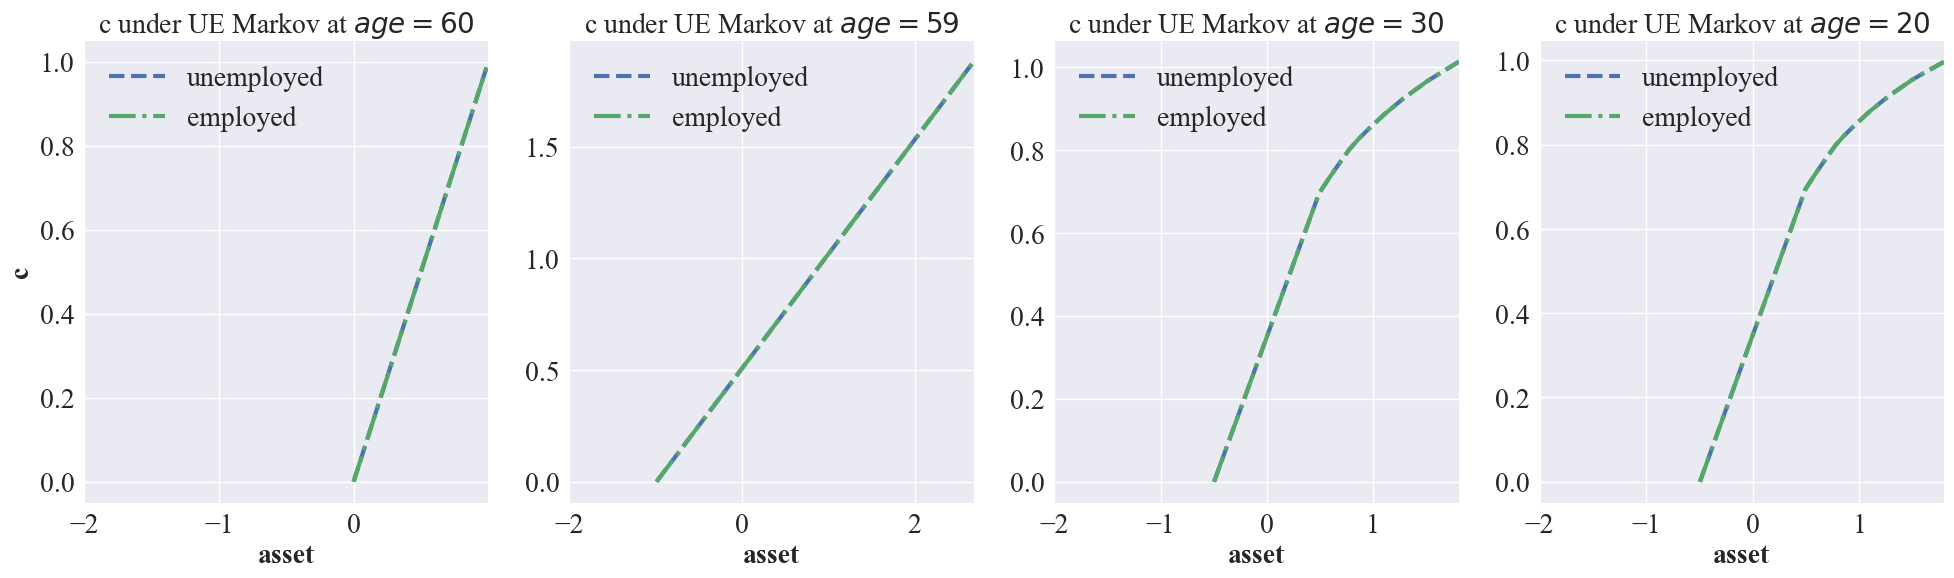

In [175]:
if __name__ == "__main__":

    ## compare two markov states of emp and uemp 

    years_left = [0,1,30,40]

    n_sub = len(years_left)

    eps_id = 0

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc_uemkv.L-year
        i = lc_uemkv.L-age
        m_plt_u, c_plt_u = ms_stars_uemkv[0][i,0:-1,eps_id,0],σs_stars_uemkv[0][i,0:-1,eps_id,0]
        m_plt_e, c_plt_e = ms_stars_uemkv[0][i,0:-1,eps_id,1],σs_stars_uemkv[0][i,0:-1,eps_id,1]

        axes[x].plot(m_plt_u, ## 0 indicates the low risk state 
                     c_plt_u,
                     '--',
                     label ='unemployed',
                     lw=3)
        axes[x].plot(m_plt_e, ## 1 indicates the high risk state 
                     c_plt_e,
                     '-.',
                     label ='employed',
                     lw=3)
        axes[x].legend()
        axes[x].set_xlim((-2.0,np.max(m_plt_e)))
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'c under UE Markov at $age={}$'.format(age))

### "Countercylical" risks

- unemployed perceive higher risks


In [176]:
if __name__ == "__main__":


    ss_P_cr= cal_ss_2markov(P_uemkv)
    prob_h_cr = P_uemkv[0,0]
    prob_l_cr = P_uemkv[0,1]

    ## keep average risks the same 
    ### notice here I put high risk at the first!!!
    sigma_psi_2mkv_cr = np.sqrt(mean_preserving_spread(mean = lc_uemkv.sigma_psi**2,
                                                      probs = np.array([prob_l_cr,prob_h_cr]),
                                                      l2mean_ratio = 0.1)
                               )
    ### notice here I put high risk at the first!!!
    sigma_psi_2mkv_cr = np.flip(sigma_psi_2mkv_cr)
    ### notice here I put high risk at the first!!!
    
    sigma_eps_2mkv_cr = np.sqrt(mean_preserving_spread(mean = lc_uemkv.sigma_eps**2,
                                                      probs = np.array([prob_l_cr,prob_h_cr]),
                                                      l2mean_ratio = 0.1)
                               )
    ### notice here I put high risk at the first!!!
    sigma_eps_2mkv_cr = np.flip(sigma_eps_2mkv_cr)
   ### notice here I put high risk at the first!!!


    ## again, zero loading from z
    b_y = 0.0

In [177]:
if __name__ == "__main__":
    ## compute steady state 
    av_sigma_psi_cr = np.sqrt(np.dot(P_uemkv[0,:],sigma_psi_2mkv_cr**2))
    av_sigma_eps_cr = np.sqrt(np.dot(P_uemkv[0,:],sigma_eps_2mkv_cr**2))
    print('steady state is '+str(ss_P_cr))
    print('transitory probability is '+str(P_uemkv[0,:]))

    print('average permanent risk is '+str(av_sigma_psi_cr)+' compared to objective model '+str(lc_uemkv.sigma_psi))
    print('average transitory risk is '+str(av_sigma_eps_cr)+' compared to objective model '+str(lc_uemkv.sigma_eps))

steady state is [0.2 0.8]
transitory probability is [0.2 0.8]
average permanent risk is 0.15 compared to objective model 0.15
average transitory risk is 0.0 compared to objective model 0.0


In [178]:
if __name__ == "__main__":

    lc_cr_paras = copy(lc_paras)
    lc_cr_paras['sigma_psi_2mkv'] = sigma_psi_2mkv_cr
    lc_cr_paras['sigma_eps_2mkv'] = sigma_eps_2mkv_cr
    lc_cr_paras['ue_markov'] = True
    lc_cr_paras['state_dependent_risk'] = True

    ## model instance 
    lc_cr= LifeCycle(**lc_cr_paras)

In [179]:
if __name__ == "__main__":


    ## solve the model for different transition matrices

    t_start = time()

    P_ls = [P_uemkv]
    ms_stars_cr=[]
    σs_stars_cr = []

    for i, P in enumerate(P_ls):

        ## feed the model with a markov matrix of macro state 
        lc_cr.P = P

        ## initial guess
        m_init_cr,σ_init_cr =lc_cr.terminal_solution()

        ## solve the model 
        ms_star_cr, σs_star_cr = solve_model_backward_iter(lc_cr,
                                                           m_init_cr,
                                                           σ_init_cr)
        ms_stars_cr.append(ms_star_cr)
        σs_stars_cr.append(σs_star_cr)

    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

Time taken, in seconds: 0.03416299819946289


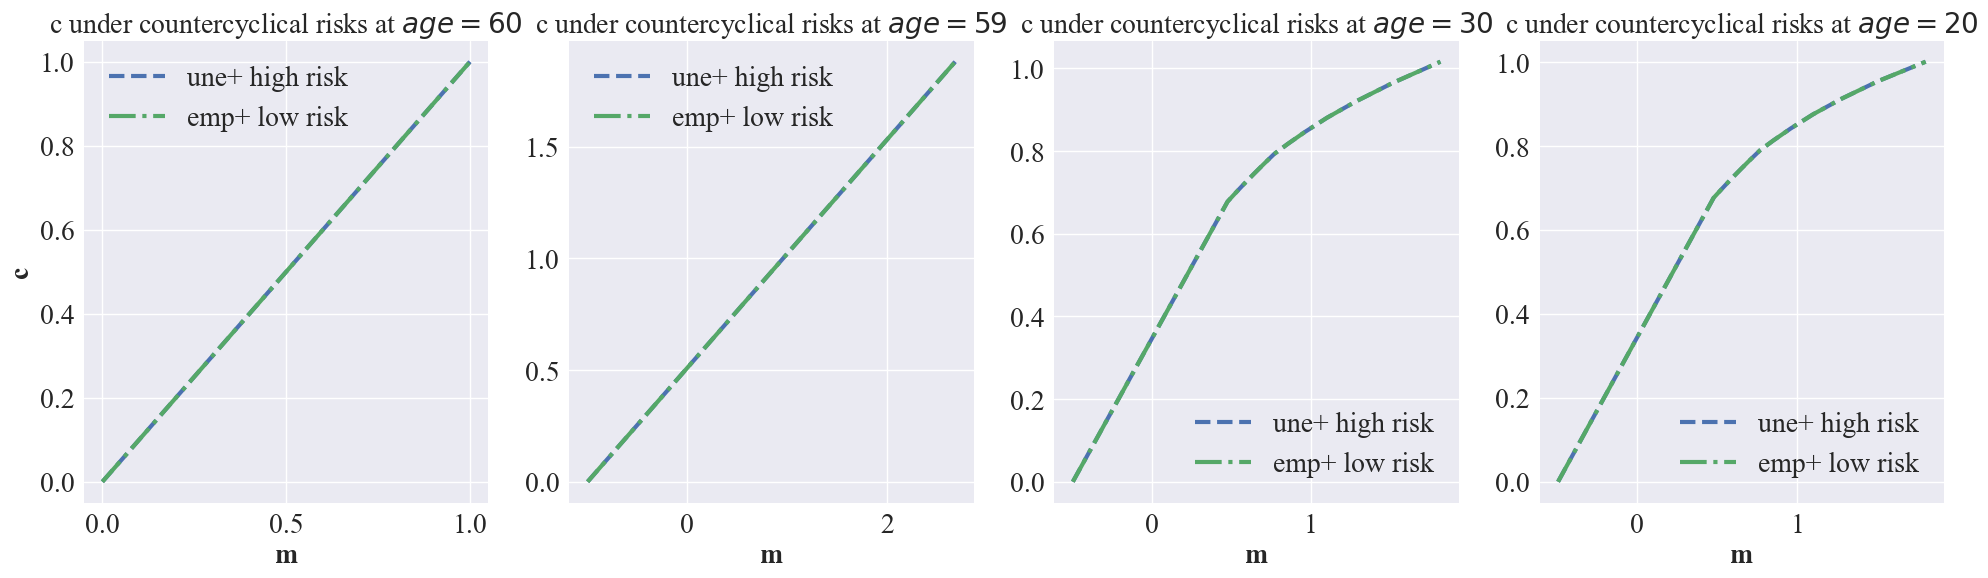

In [180]:
if __name__ == "__main__":

    ## compare two markov states low versus high risk 

    years_left = [0,1,30,40]

    n_sub = len(years_left)

    eps_id = 0

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc.L-year
        i = lc.L-age
        m_plt_l,c_plt_l = ms_stars_cr[0][i,0:-1,eps_id,0],σs_stars_cr[0][i,0:-1,eps_id,0]
        m_plt_h,c_plt_h = ms_stars_cr[0][i,0:-1,eps_id,1],σs_stars_cr[0][i,0:-1,eps_id,1]
        
        axes[x].plot(m_plt_l, ## 0 indicates the low risk state 
                     c_plt_l,
                     '--',
                     label ='une+ high risk',
                     lw = 3)
        axes[x].plot(m_plt_h, ## 1 indicates the high risk state 
                     c_plt_h,
                     '-.',
                     label ='emp+ low risk',
                     lw = 3)
        axes[x].legend()
        axes[x].set_xlabel('m')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'c under countercyclical risks at $age={}$'.format(age))

### Objective and subject state-dependent profile

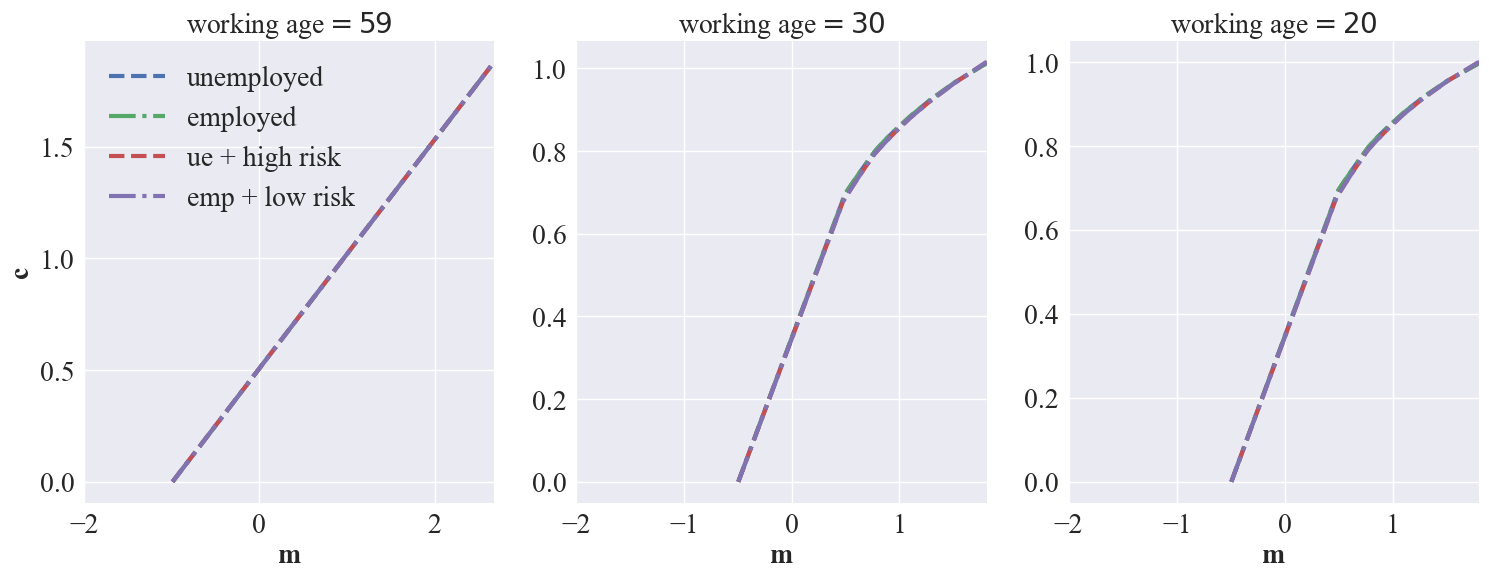

In [181]:
if __name__ == "__main__":

    ## compare subjective and objective models 

    years_left = [1,30,40]

    n_sub = len(years_left)

    eps_ls = [0]

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc.L-year
        i = lc.L-age
        for eps in eps_ls:
    
            ## persistent 
            m_plt_u, c_plt_u = ms_stars_uemkv[0][i,0:-1,eps,0],σs_stars_uemkv[0][i,0:-1,eps,0]
            m_plt_e, c_plt_e = ms_stars_uemkv[0][i,0:-1,eps,1],σs_stars_uemkv[0][i,0:-1,eps,1]
            axes[x].plot(m_plt_u,
                         c_plt_u,
                         '--',
                         label ='unemployed',
                         lw=3)
            axes[x].plot(m_plt_e,
                         c_plt_e,
                         '-.',
                         label ='employed',
                         lw=3)
            ## countercyclical 
            m_plt_l,c_plt_l = ms_stars_cr[0][i,0:-1,eps,0],σs_stars_cr[0][i,0:-1,eps,0]
            m_plt_h,c_plt_h = ms_stars_cr[0][i,0:-1,eps,1],σs_stars_cr[0][i,0:-1,eps,1]
            axes[x].plot(m_plt_l, ## 0 indicates the low risk state 
                     c_plt_l,
                     '--',
                     label ='ue + high risk',
                     lw=3)
            axes[x].plot(m_plt_h, ## 1 indicates the high risk state 
                         c_plt_h,
                         '-.',
                         label ='emp + low risk',
                         lw=3)
        axes[0].legend()
        axes[x].set_xlim((-2.0,np.max(m_plt_e)))
        axes[x].set_xlabel('m')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'working age$={}$'.format(age))

    #plt.suptitle('Various Straight Lines',fontsize=20)

    fig.savefig('../Graphs/model/comparison2.png')

## Infinite horizon problem

Error at iteration 50 is 0.012891383247632504.
Error at iteration 100 is 0.0003499143380105707.
Error at iteration 150 is 1.0062982165770507e-05.

Converged in 183 iterations.
Time taken, in seconds: 0.1317157745361328


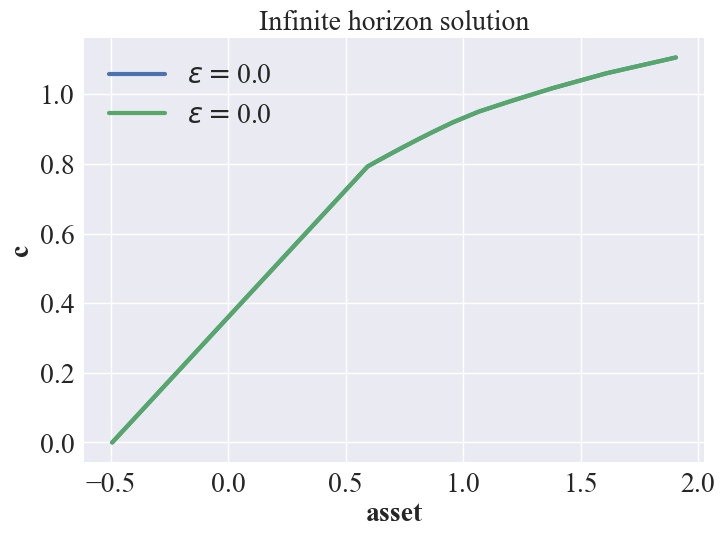

In [182]:
if __name__ == "__main__":
    
    inf_liv_paras = copy(lc_paras)
    
    ## initialize a model instance

    inf_liv = LifeCycle(**inf_liv_paras)


    ## initial guess of consumption functions 

    m_init,σ_init = inf_liv.terminal_solution()
   

    t_start = time()


    x_ls = [0.0]
    ms_inf_stars =[]
    σs_inf_stars = []
    for i,x in enumerate(x_ls):

        ## set different ma parameters 
        inf_liv.x = x
        m_inf_star, σ_inf_star = solve_model_iter(inf_liv,
                                                  m_init,
                                                  σ_init)
        ms_inf_stars.append(m_inf_star)
        σs_inf_stars.append(σ_inf_star)


    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))   


    ## plot c func 

    eps_ls = [0,1]

    ms_inf_star = ms_inf_stars[0]
    σs_inf_star = σs_inf_stars[0]


    for eps in eps_ls:
        plt.plot(ms_inf_star[0:-1,eps,0],
                 σs_inf_star[0:-1,eps,0],
                 label = r'$\epsilon=$'+str(round(inf_liv.eps_grid[eps],2)),
                 lw=3
                )
        plt.legend()
        plt.xlabel('asset')
        plt.ylabel('c')
        plt.title('Infinite horizon solution')

## Infinite horizon with adjustment inertia



Error at iteration 50 is 0.03418123454684219.
Error at iteration 100 is 0.008822203017349706.
Error at iteration 150 is 0.003805352425844566.
Error at iteration 200 is 0.0019742473741015676.
Error at iteration 250 is 0.001121983834406537.
Error at iteration 300 is 0.0006711204380769331.
Error at iteration 350 is 0.00041388238538209166.
Error at iteration 400 is 0.00026009147456551585.
Error at iteration 450 is 0.00016538966075307915.
Error at iteration 500 is 0.00010596271239871058.
Error at iteration 550 is 6.821614030505518e-05.
Error at iteration 600 is 4.405202564561339e-05.
Error at iteration 650 is 2.8504457148526008e-05.
Error at iteration 700 is 1.846806215022312e-05.
Error at iteration 750 is 1.1975502430705554e-05.
Error at iteration 800 is 7.769661302337028e-06.
Error at iteration 850 is 5.04270420054187e-06.
Error at iteration 900 is 3.27358964491431e-06.
Error at iteration 950 is 2.1254430331296703e-06.
Error at iteration 1000 is 1.3801191083295805e-06.

Converged in 1038 

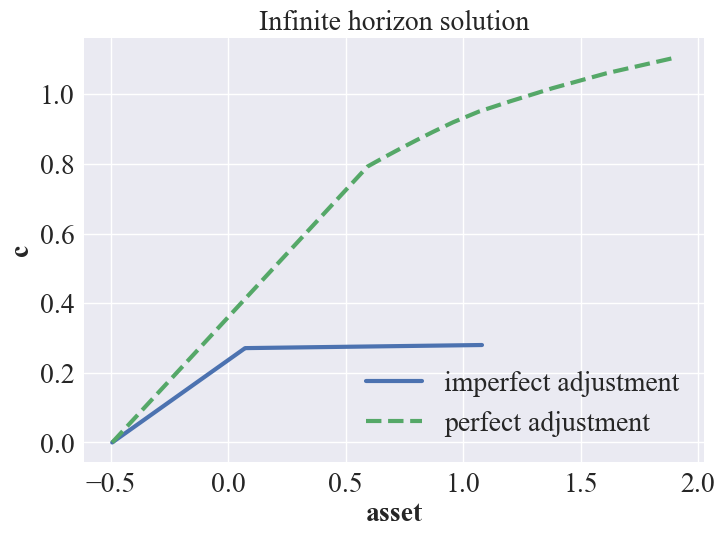

In [183]:
if __name__ == "__main__":


    ## Initialize a model instance
    imp_adjust_paras = copy(lc_paras)
    imp_adjust_paras['adjust_prob'] = 0.6
    
    imp_adjust = LifeCycle(**imp_adjust_paras)

    ## initial consumption functions 
    m_init,σ_init = imp_adjust.terminal_solution()

    t_start = time()

    x_ls = [0.0]
    ms_imp_stars =[]
    σs_imp_stars = []
    for i,x in enumerate(x_ls):

        ## set different ma parameters 
        inf_liv.x = x
        m_imp_star, σ_imp_star = solve_model_iter(imp_adjust,
                                                  m_init,
                                                  σ_init)
        ms_imp_stars.append(m_imp_star)
        σs_imp_stars.append(σ_imp_star)


    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))   


    ## plot c func at different age /asset grid

    eps_ls = [0]

    ms_imp_star = ms_imp_stars[0]
    σs_imp_star = σs_imp_stars[0]

    for y,eps in enumerate(eps_ls):
        plt.plot(ms_imp_star[0:-1,eps,1],
                 σs_imp_star[0:-1,eps,1],
                 '-',
                 label = 'imperfect adjustment',
                 lw=3
                )
        plt.plot(ms_inf_star[0:-1,eps,1],
                 σs_inf_star[0:-1,eps,1],
                 '--',
                 label = 'perfect adjustment',
                 lw=3
                )
        plt.legend()
        plt.xlabel('asset')
        plt.ylabel('c')
        plt.title('Infinite horizon solution')